[[0.22311241 0.56383522 0.21305237]
 [0.64546755 0.06142513 0.29310732]
 [0.78802068 0.08057237 0.13140695]
 [0.5502399  0.2714826  0.17827751]
 [0.63832904 0.21643799 0.14523297]
 [0.91359722 0.01733049 0.06907229]
 [0.05854778 0.71693787 0.22451435]
 [0.74429686 0.06012792 0.19557522]
 [0.55159345 0.25937187 0.18903467]
 [0.49018815 0.06115451 0.44865735]
 [0.60437936 0.1723443  0.22327635]
 [0.32689043 0.58050958 0.09259998]
 [0.56489366 0.29172409 0.14338226]
 [0.8480169  0.01418861 0.13779449]
 [0.70446831 0.22905156 0.06648013]
 [0.47775699 0.10686787 0.41537514]
 [0.58556291 0.35893065 0.05550644]
 [0.17031699 0.50441637 0.32526664]
 [0.1998814  0.29245221 0.50766639]
 [0.7876349  0.05791105 0.15445405]
 [0.31305883 0.61858962 0.06835154]
 [0.11928301 0.08902263 0.79169436]
 [0.2721932  0.12658668 0.60122012]
 [0.76656952 0.12796649 0.10546399]
 [0.57226746 0.18012309 0.24760945]
 [0.48340681 0.27426418 0.24232901]
 [0.27996878 0.37880589 0.34122533]
 [0.67539456 0.31962451 0.00

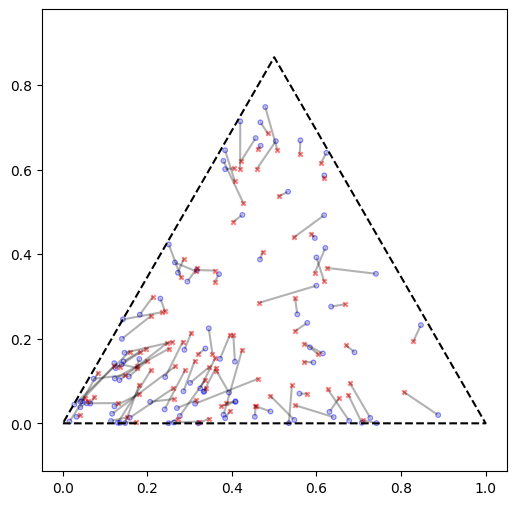

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
n = 100
alpha = [1.1, .6, .5]
samples = np.random.dirichlet(alpha, size=n)
noise = np.random.normal(0, 0.1, samples.shape)
inferred = samples + np.abs(noise)
inferred = inferred/np.sum(inferred, axis=1, keepdims=True)  # Normalize to stay in simplex
print(inferred)

# Triangle vertices (equilateral triangle)
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, np.sqrt(3)/2])

# Barycentric -> Cartesian
def barycentric_to_cartesian(p):
    return p[0]*v1 + p[1]*v2 + p[2]*v3

true_points = np.array([barycentric_to_cartesian(p) for p in samples])

inferred_points = np.array([barycentric_to_cartesian(p) for p in inferred])



# Plot
plt.figure(figsize=(6,6))
plt.scatter(true_points[:,0], true_points[:,1], s=10, marker='o', alpha=0.5, facecolors='none', edgecolors='b')
plt.scatter(inferred_points[:,0], inferred_points[:,1], s=10, marker='x', alpha=0.5, color='r')
for i in range(n):
    plt.plot([true_points[i,0], inferred_points[i,0]], [true_points[i,1], inferred_points[i,1]], '-', c='k', alpha=0.3)
plt.plot([v1[0], v2[0], v3[0], v1[0]],
         [v1[1], v2[1], v3[1], v1[1]], 'k--')  # Triangle outline
plt.axis('equal')
plt.show()